去重前数据量： 20358
去重后数据量： 19779
缺失值统计：
id                  0
label               0
login               0
type                0
site_admin          0
name                0
company             0
blog                0
location            0
email               0
hireable            0
bio                 0
twitter_username    0
public_repos        0
public_gists        0
followers           0
following           0
created_at          0
updated_at          0
dtype: int64


C:\Users\57572\AppData\Local\Temp\ipykernel_22392\1003869995.py:28: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(False).astype(bool)


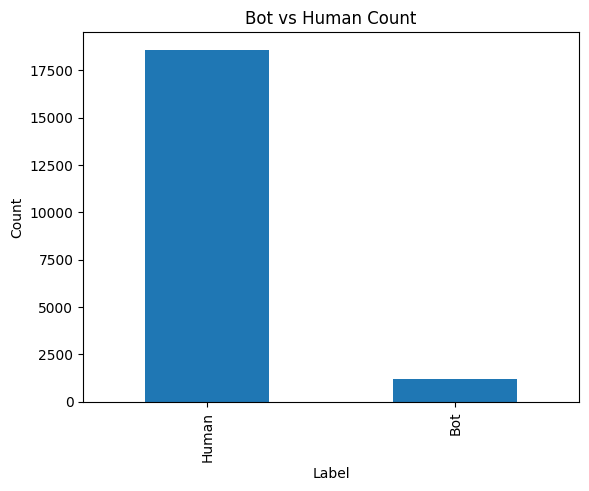

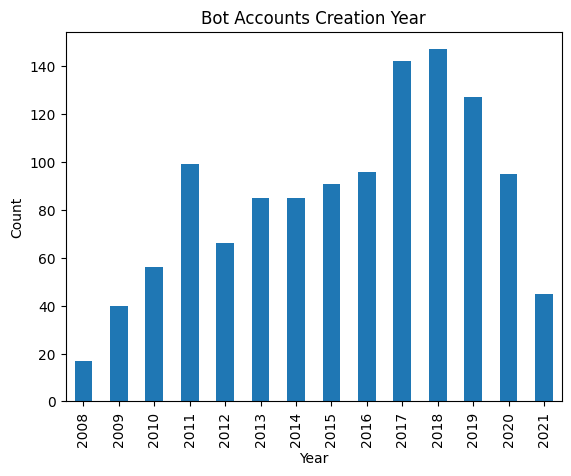

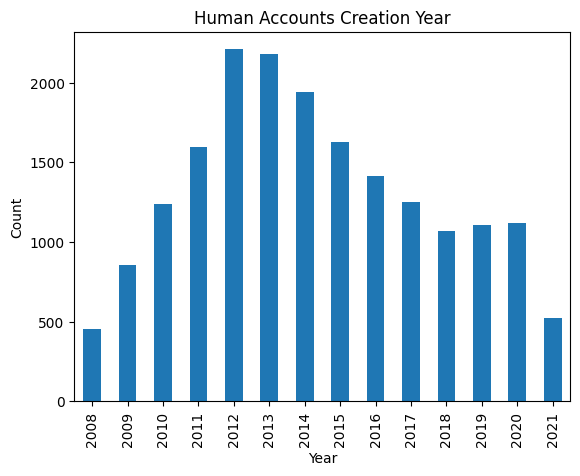

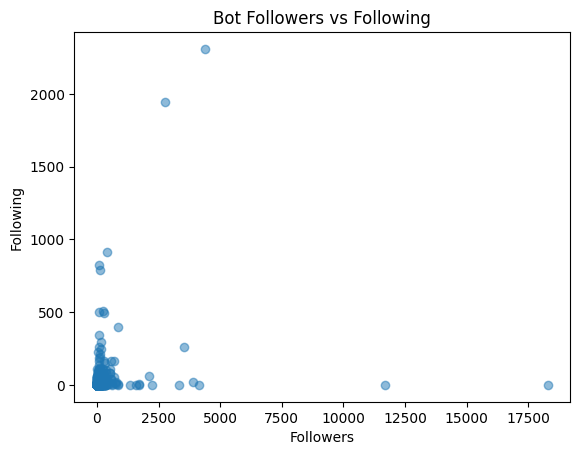

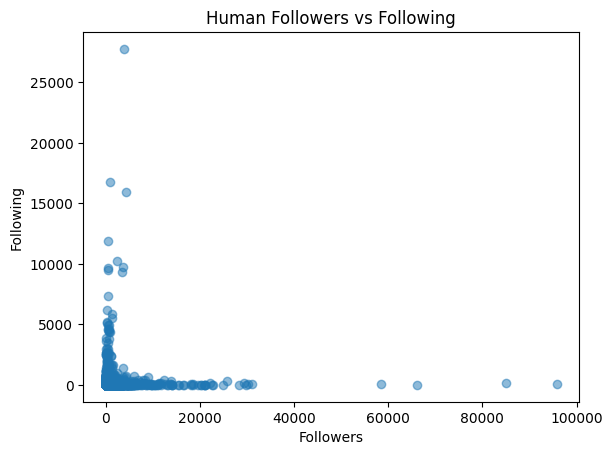

数据预处理完成，已导出为processed_github_data.csv


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载原始数据
raw_data = pd.read_csv('github_bot_raw_data.csv')

# 保留需要的列
columns = [
    'id', 'label', 'login', 'type', 'site_admin', 'name', 'company', 'blog', 'location', 'email',
    'hireable', 'bio', 'twitter_username', 'public_repos', 'public_gists', 'followers', 'following',
    'created_at', 'updated_at'
]
data = raw_data[columns]

# 1. 删除重复数据
print("去重前数据量：", len(data))
data = data.drop_duplicates()
print("去重后数据量：", len(data))

# 2. 缺失值处理
# 删除不必要的列
if 'gravatar_id' in data.columns:
    data = data.drop(columns=['gravatar_id'])

# 转换布尔值列
bool_columns = ['site_admin', 'hireable']
for col in bool_columns:
    data[col] = data[col].fillna(False).astype(bool)

# 填充文本类缺失值为空字符串
text_columns = ['name', 'company', 'blog', 'location', 'email', 'bio', 'twitter_username']
for col in text_columns:
    data[col] = data[col].fillna('')

# 再次检查无缺失值
print("缺失值统计：")
print(data.isnull().sum())

# 3. 数据转换
# 将created_at和updated_at转换为时间戳
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])

# 4. 数据可视化
# 4.1 可视化bot和human类型的分布
data['label'].value_counts().plot(kind='bar', title='Bot vs Human Count')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 4.2 bot账号的created_at分布
bot_data = data[data['label'] == 'Bot']
bot_data['created_at'].dt.year.value_counts().sort_index().plot(kind='bar', title='Bot Accounts Creation Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# 4.3 human账号的created_at分布
human_data = data[data['label'] == 'Human']
human_data['created_at'].dt.year.value_counts().sort_index().plot(kind='bar', title='Human Accounts Creation Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# 4.4 bot账号的followers和following分布
plt.scatter(bot_data['followers'], bot_data['following'], alpha=0.5)
plt.title('Bot Followers vs Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

# 4.5 human账号的followers和following分布
plt.scatter(human_data['followers'], human_data['following'], alpha=0.5)
plt.title('Human Followers vs Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

# 导出处理后的数据
data.to_csv('processed_github_data.csv', index=False)
print("数据预处理完成，已导出为processed_github_data.csv")
